In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
dataframes = [pd.read_csv(f"data/{p}_baseline.csv") for p in ["lgp", "cgp"]]
dataframes.append(pd.read_csv("data/cgp_local.csv"))
mulambda = pd.read_csv("data/cgp_mu+lambda.csv")
mulambda["training.generation"] = mulambda["_step"]
dataframes.append(mulambda)
df = pd.concat(dataframes, ignore_index=True)
df.rename(lambda x: x.replace("training.", "").replace("run_id", "seed"), axis="columns", inplace=True)
df["environment"] = df["environment"].apply(lambda x: x.replace("-", ""))
df = df[[c for c in df.columns if not c.startswith("Unnamed")]]
df.head()

,fitness_3q,evaluation_time,top_k_fit.top_1_fit,_runtime,seed,fitness_1q,generation,fitness_mean,fitness_median,fitness_std,_step,_timestamp,top_k_fit.top_0_fit,top_k_fit.top_2_fit,solver,environment
0,289.529968,19.97117,688.193115,21.419822,0,555.956909,0,425.567230,349.372406,197.723236,0,1.686304e+09,791.839844,570.485779,lgp,ant
1,385.709930,19.97117,900.334290,21.718155,1,706.488403,0,492.084290,411.964294,316.435394,1,1.686304e+09,977.877319,706.535706,lgp,ant
2,296.074280,19.97117,706.784546,22.014669,2,639.220703,0,432.221771,446.778564,243.935150,2,1.686304e+09,707.024414,642.126221,lgp,ant
3,263.423767,19.97117,665.460815,22.313905,3,616.348022,0,416.506409,383.434418,222.942413,3,1.686304e+09,804.379517,658.898254,lgp,ant
4,302.902283,19.97117,704.192261,22.607100,4,675.323486,0,513.130981,544.031250,243.379929,4,1.686304e+09,997.036011,698.522766,lgp,ant


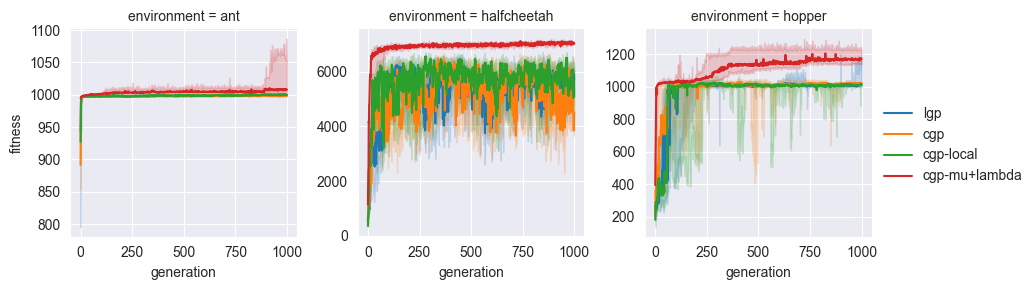

In [49]:
g = sns.FacetGrid(df[df["generation"] < 1000], col="environment", sharey=False)
g.map_dataframe(sns.lineplot, x="generation", y="top_k_fit.top_0_fit", hue="solver",
                estimator="median", errorbar=("pi", 50))
g.set_xlabels("generation")
g.set_ylabels("fitness")
g.add_legend()
plt.show()

In [50]:
graph_dfs = []
for p in ["", "_local", "_mu+lambda"]:
    temp_df = pd.read_csv(f"data/graph_sizes{p}.csv")
    temp_df["solver"] = temp_df["solver"] if len(p) == 0 else p.replace("_", "cgp-")
    graph_dfs.append(temp_df)
graph_sizes = pd.concat(graph_dfs, ignore_index=True)
graph_sizes["relative_size"] = graph_sizes["graph_size"] / graph_sizes["max_size"]
graph_sizes.head()

,seed,generation,graph_size,max_size,environment,solver,run_id,relative_size
0,1,799,24.0,61.0,hopper,cgp,9i011yqb,0.393443
1,5,1699,18.0,61.0,hopper,cgp,9i011yqb,0.295082
2,7,3999,17.0,61.0,hopper,cgp,9i011yqb,0.278689
3,6,4399,18.0,61.0,hopper,cgp,9i011yqb,0.295082
4,3,3199,18.0,61.0,hopper,cgp,9i011yqb,0.295082


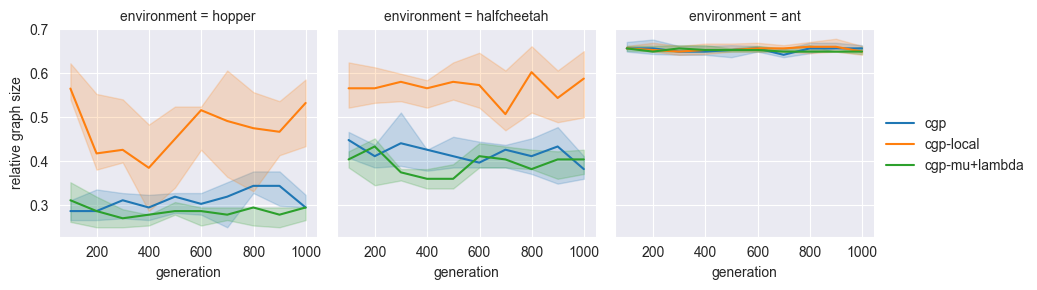

In [51]:
# melted_graph_sizes = pd.melt(graph_sizes, id_vars=["generation", "seed", "environment", "solver"],
#                              value_vars=["graph_size", "max_size"])
# g = sns.FacetGrid(melted_graph_sizes, col="environment")
# g.map_dataframe(sns.lineplot, x="generation", y="value", estimator="median",
#                 errorbar=("pi", 50), hue="variable")
g = sns.FacetGrid(graph_sizes[graph_sizes["generation"] < 1000], col="environment")
g.map_dataframe(sns.lineplot, x="generation", y="relative_size", estimator="median",
                errorbar=("pi", 50), hue="solver")
g.set_xlabels("generation")
g.set_ylabels("relative graph size")
g.add_legend()
plt.show()

In [52]:
join_df = graph_sizes.merge(df, on=["solver", "generation", "environment", "seed"])
# max_gens = join_df.groupby(["solver", "environment", "seed"])["generation"].max().reset_index()
# join_df = join_df.merge(max_gens, on=["solver", "generation", "environment", "seed"])
join_df = join_df[join_df["generation"] == 999]
join_df.head()

,seed,generation,graph_size,max_size,environment,solver,run_id,relative_size,fitness_3q,evaluation_time,top_k_fit.top_1_fit,_runtime,fitness_1q,fitness_mean,fitness_median,fitness_std,_step,_timestamp,top_k_fit.top_0_fit,top_k_fit.top_2_fit
56,8,999,21.0,61.0,hopper,cgp,9i011yqb,0.344262,46.545025,2.024791,1004.061096,2215.453817,112.626930,246.389816,52.629555,384.126160,9998,1.686228e+09,1020.898010,126.213890
206,5,999,15.0,61.0,hopper,cgp,9i011yqb,0.245902,52.563572,2.024791,1046.350952,2215.410258,204.668182,276.472137,90.655548,390.145905,9995,1.686228e+09,1048.588135,234.456161
246,4,999,20.0,61.0,hopper,cgp,9i011yqb,0.327869,79.336304,2.024791,1055.648560,2215.395244,290.868958,330.833221,159.131927,372.528076,9994,1.686228e+09,1061.113525,294.188812
316,7,999,18.0,61.0,hopper,cgp,9i011yqb,0.295082,33.698639,2.024791,1002.173645,2215.439757,142.097763,250.436600,70.306480,380.724731,9997,1.686228e+09,1011.616394,151.332825
369,9,999,18.0,61.0,hopper,cgp,9i011yqb,0.295082,56.706364,2.024791,1025.795532,2215.468459,782.828491,295.146393,86.977341,508.657959,9999,1.686228e+09,1025.992432,1002.624451


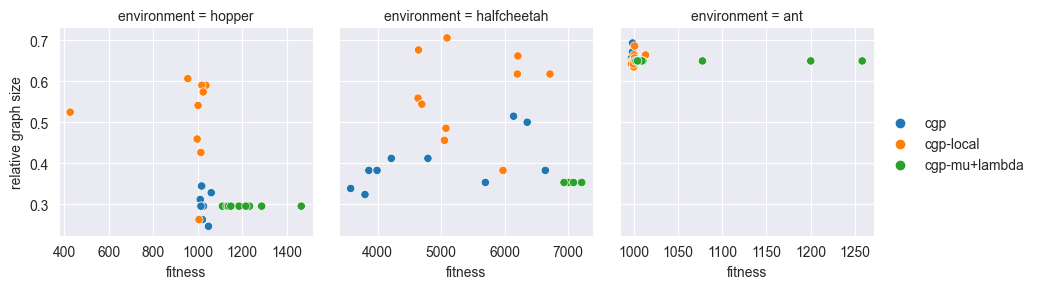

In [53]:
g = sns.FacetGrid(join_df, col="environment", sharex=False)
g.map_dataframe(sns.scatterplot, x="top_k_fit.top_0_fit", y="relative_size", hue="solver")
g.set_xlabels("fitness")
g.set_ylabels("relative graph size")
g.add_legend()
plt.show()